In [4]:
import torch
import torch.nn as nn

class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        # Multi-Layer Perzeptron (MLPs)
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, action_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

import pickle
f = open("learning/dqn_lunar_lander_rewards_per_episode_00990.pkl", "rb")
returns = pickle.load(f)
network = pickle.load(f)
f.close()

In [5]:
returns

[-213.2579762987041,
 -268.72944772780545,
 -111.958732770896,
 -88.26534315174666,
 -92.88388010343716,
 -347.73450925130635,
 -105.74051272085569,
 -196.90475029664353,
 -374.24790713701503,
 -76.27934202146764,
 -156.53255823184736,
 -107.84054351562007,
 -282.5207473731408,
 -137.84401016132225,
 -215.57085068909169,
 -117.39649904355565,
 -121.67994523003856,
 -351.03907742249714,
 -103.28188213471759,
 -307.3976801195637,
 -119.52613845790856,
 -116.1061980169307,
 -55.66264822761267,
 -76.93781561006222,
 -86.64752051183603,
 -138.69788045190228,
 -449.92069245888797,
 -257.18666757294966,
 -190.28556958739665,
 -92.22247181788651,
 -205.14256413125412,
 -137.7532864353403,
 -86.97418377170771,
 -259.04400266401126,
 -313.90576970705354,
 -146.78759082917082,
 -110.11912373857825,
 -143.80894438695617,
 -106.77548722668689,
 -229.7426521438519,
 -130.90437292608766,
 -82.246901086094,
 -48.55955019120795,
 -65.58499162741167,
 -110.1271792495864,
 -93.68678822995781,
 -165.37573

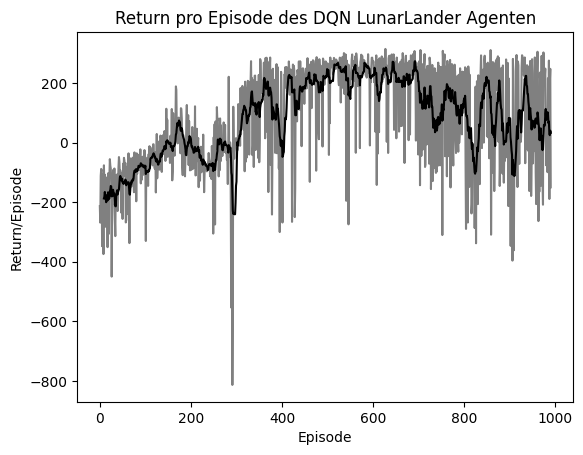

In [12]:
import pandas
d = {"Return" : returns}
t = pandas.DataFrame(d)
smooth_return = t["Return"].rolling(10).mean()


import matplotlib.pyplot as plt
plt.plot( returns, color="gray" )
plt.plot( smooth_return, color="black")
plt.xlabel("Episode")
plt.ylabel("Return/Episode")
plt.title("Return pro Episode des DQN LunarLander Agenten")
plt.show()

In [11]:
import pandas
d = {"Return" : returns}
t = pandas.DataFrame(d)
t["Return"].rolling(10).mean()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
986    70.390906
987    29.566809
988    24.862237
989    39.938074
990    32.553355
Name: Return, Length: 991, dtype: float64

In [5]:
dateiname = "abc.pkl"
#if dateiname != None:
if not dateiname is None:
    print("Der Dateiname ist gesetzt")
else:
    print("Der Dateiname ist NICHT gesetzt!")

Der Dateiname ist gesetzt


In [6]:
import torch
print(torch.cuda.is_available())

True


In [7]:
# Überprüfen, ob eine GPU verfügbar ist
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
device

device(type='cuda')

# Analyse des Lernvorgangs: Agent ohne ReplayBuffer

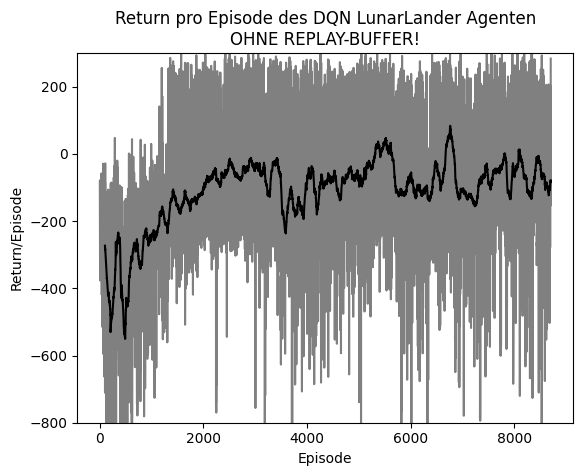

In [13]:
import torch
import torch.nn as nn

class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        # Multi-Layer Perzeptron (MLPs)
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, action_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# 1. Das Wiederherstellen der Historie der Returns / Episode
import pickle
f = open("learning_run2_ohne_replaybuffer/dqn_lunar_lander_rewards_per_episode_08700.pkl", "rb")
returns = pickle.load(f)
network = pickle.load(f)
f.close()

# 2. Aus der Folge von Returns / Episode eine Tabelle bzw. Tabellenspalte machen
import pandas
d = {"Return" : returns}
t = pandas.DataFrame(d)
smooth_return = t["Return"].rolling(100).mean()


# 3. Visualisieren der Folge von Returns
import matplotlib.pyplot as plt
plt.plot( returns, color="gray" )
plt.plot( smooth_return, color="black")
plt.ylim(-800,300)
#plt.xlim(0,1000)
plt.xlabel("Episode")
plt.ylabel("Return/Episode")
plt.title("Return pro Episode des DQN LunarLander Agenten\nOHNE REPLAY-BUFFER!")
plt.show()

In [14]:
(8740*460)/1000/60

67.00666666666667